# Dependencies

# Imports

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Environment Setup

# Dataset Building

## Downloading

In [2]:
def load_game_of_thrones_data():
    # Lista dei nomi dei file CSV
    file_names = ['book1.csv', 'book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']

    # Dizionario per memorizzare i dataframe
    dataframes = {}

    # Itera attraverso i file e carica i dati
    for file_name in file_names:
        url = f'https://raw.githubusercontent.com/RiccardoRomeo01/SocialNetworkAnalysisProject/main/GameOfThronesDataset/{file_name}'
        dataframes[file_name] = pd.read_csv(url)

    return dataframes

In [3]:
# Utilizzo della funzione
dataframes = load_game_of_thrones_data()

# Accesso ai dataframe
book1_df = dataframes['book1.csv']
book2_df = dataframes['book2.csv']
book3_df = dataframes['book3.csv']
book4_df = dataframes['book4.csv']
book5_df = dataframes['book5.csv']

## Exploring

In [4]:
book1_df = book1_df.drop(labels=['book','Type'], axis=1)
book2_df = book2_df.drop(labels=['book','Type'], axis=1)
book3_df = book3_df.drop(labels=['book','Type'], axis=1)
book4_df = book4_df.drop(labels=['book','Type'], axis=1)
book5_df = book5_df.drop(labels=['book','Type'], axis=1)

In [5]:
book1_df.head()

,Source,Target,weight
0,Addam-Marbrand,Jaime-Lannister,3
1,Addam-Marbrand,Tywin-Lannister,6
2,Aegon-I-Targaryen,Daenerys-Targaryen,5
3,Aegon-I-Targaryen,Eddard-Stark,4
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4


In [6]:
all_book_df = pd.concat([book1_df, book2_df, book3_df, book4_df, book5_df])
all_book_df['Source'], all_book_df['Target'] = zip(*all_book_df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# Graph Creation

In [7]:
G_1 = nx.from_pandas_edgelist(book1_df, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(book2_df, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(book3_df, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(book4_df, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(book5_df, 'Source', 'Target', edge_attr=True)
G_all = nx.from_pandas_edgelist(all_book_df, 'Source', 'Target', edge_attr=True)

# Metrics

## Nodes

### Degree Centrality

In [94]:
def plot_degree_centrality(centrality, title, font_size=8, bar_width=1, spacing=1):
    """
    Plots the degree centrality of the given graph.

    Parameters:
    centrality (dict): The input graph centrality.
    title (str): The title for the plot.
    font_size (int): The font size for the node labels in the plot.
    bar_width (float): The width of the bars in the histogram.
    spacing (float): The space between the bars.

    Returns:
    None: The function displays a plot of degree centrality.
    """

    # Prepare data for plotting
    nodes = list(centrality.keys())
    values = list(centrality.values())

    # Create x-coordinates for bars with spacing
    x_positions = np.arange(len(nodes)) * (bar_width + spacing)

    # Create the plot
    plt.figure(figsize=(15, 5))
    plt.bar(x_positions, values, color='skyblue', width=bar_width)  # Adjust bar positions here
    plt.xlabel('Nodes')
    plt.ylabel('Degree Centrality')
    plt.title(title, color="olivedrab")
    plt.xticks(x_positions + bar_width / 2, nodes, rotation=90, fontsize=font_size)  # Center labels
    plt.grid(axis='y')
    plt.xlim(-0.5, len(nodes) * (bar_width + spacing) - spacing)  # Limiti dell'asse x

    # Show the plot
    plt.tight_layout()
    plt.show()

In [24]:
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_all = nx.degree_centrality(G_all)

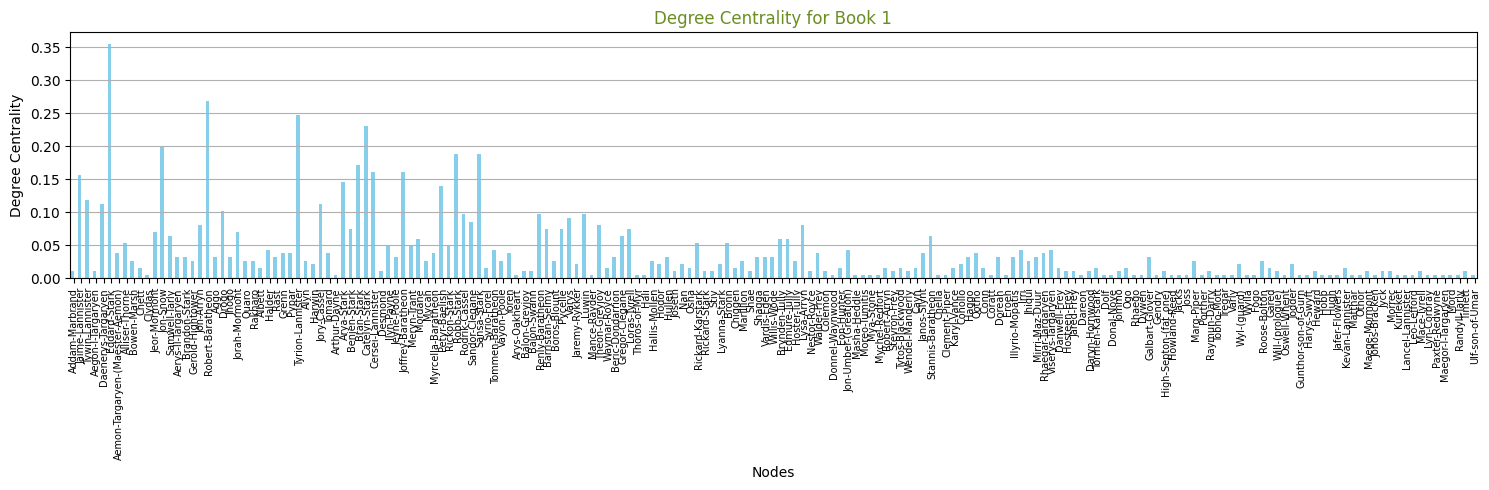

In [92]:
plot_degree_centrality(degree_1, 'Degree Centrality for Book 1', font_size=7)

### Eigenvector Centrality

### Katz Centrality

### Closeness Centrality

### Betweenness Centrality

### Clusters of Nodes

#### Cliques

#### Cores

#### K-Components

#### Local Clustering

### Similarity-Equivalence

#### Structural Equivalence

#### Regular Equivalence

### Homophily-Assortative Mixing

## Network

### Degree Distribution

### Eigenvector Centrality

### Closeness Centrality

### Betweeness Centrality

### Local Clustering Coefficient

### Cohesion

#### Density

#### Connectedness

#### Compactness

### Reciprocity

### Transitivity

### Centralisation and Core-periphery Indices

# Conclusions and Results